In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pathlib import Path

from pandas import testing as tm

from sklearn.metrics import mean_absolute_error

import lib

In [194]:
pd.options.display.float_format = '{:,.2f}'.format

sns.set_theme(style="whitegrid", palette="muted")

sns.color_palette()

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

Функция поиска выбросов и диапазона

In [195]:
def plotMovingAverage(series: pd.DataFrame, window: int, plot_intervals: bool = False, scale: int = 1.96, plot_anomalies: bool = False) -> None:

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(20,8))
    plt.title("Скользящее среднее\n размер окна = {}".format(window))
    plt.plot(rolling_mean, "r", label="Скользящее среднее")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "g--", label="Верхняя / нижняя граница")
        plt.plot(lower_bond, "g--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Истинные значения")
    plt.legend(loc="upper left")
    plt.grid(True)

## Анализ исходных данных по автоклаву AC103


### Подготовка данных

Загрузим данные и заменим названия колонок.

In [196]:
WORK_DIR = "C:\\Users\\Laevskiy\Desktop\\05-22\\AC103"

In [197]:
filepath = Path(f'./{WORK_DIR}/df_total_ds_1h.zip')
df = pd.read_csv(filepath, index_col=0)
df.index.name = None
df.index = pd.to_datetime(df.index)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24471 entries, 2019-01-07 08:00:00 to 2021-12-31 17:00:00
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   320PU107           24471 non-null  float64
 1   320PU109           24471 non-null  float64
 2   320RC103DIC02      24471 non-null  float64
 3   330AC103FI06       24471 non-null  float64
 4   330AC103FI07       24471 non-null  float64
 5   330AC103FI08       24471 non-null  float64
 6   330AC103FI09       24471 non-null  float64
 7   330AC103FI10       24471 non-null  float64
 8   330AC103FI51       24471 non-null  float64
 9   330AC103FI52       24471 non-null  float64
 10  330AC103FIC40      24471 non-null  float64
 11  330AC103FICZ01     24471 non-null  float64
 12  330AC103FICZ02     24471 non-null  float64
 13  330AC103FICZ03     24471 non-null  float64
 14  330AC103FICZ04     24471 non-null  float64
 15  330AC103FICZ05     24471 non-null  

In [199]:
cols = [
    'Fel_1',
    'Fel_2',
    'D_SL',
    'QQ_C1',
    'QQ_C2',
    'QQ_C3',
    'QQ_C4',
    'QQ_C5',
    'O2_tot',
    'QQ_tot',
    'Sl_tot',
    'O2_C1',
    'O2_C2',
    'O2_C3',
    'O2_C4',
    'O2_C5',
    'AC_level',
    'AC_rbk_open',
    'AC_valve_open',
    'P_H2O',
    'P_O2',
    'P_tot',
    'P_valve',
    'P_tot_2',
    'T_C1',
    'T_C2',
    'T_C3',
    'T_C4',
    'T_C5',
    'T_abg',
    'P_O2_in',
    'FT1_level',
    'FT1_P',
    'FT1_T_in',
    'FT1_T',
    'FT2_level',
    'FT2_P',
    'FT2_T',
    'Cond_Q',
    'Cond_level',
    'Cond_valve',
    'O2_conc_1',
    'O2_conc_2',
    'Fe',
    'Stot',
    'SO4',
    'As',
    'Corg',
    'Ctot',
    'Fe2+',
    'D_S',
    'D_SL_H'
]

In [200]:
df.columns = cols

In [201]:
df.head()

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,O2_conc_2,Fe,Stot,SO4,As,Corg,Ctot,Fe2+,D_S,D_SL_H
2019-01-07 08:00:00,0.00,0.00,988.13,0.00,0.04,0.00,-0.00,0.00,"4,950.00",0.04,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
2019-01-07 09:00:00,0.00,0.00,988.14,0.00,0.02,0.00,-0.00,0.00,"4,950.00",0.02,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
2019-01-07 10:00:00,0.00,0.00,988.14,0.00,0.02,0.00,-0.00,0.00,"4,950.00",0.02,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
2019-01-07 11:00:00,0.00,0.00,988.14,0.00,0.02,0.00,-0.00,0.00,"4,950.00",0.02,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
2019-01-07 12:00:00,0.00,0.00,988.14,0.00,0.02,0.00,-0.00,0.00,"4,950.00",0.02,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN


In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"24,471.00",10.51,17.49,0.00,0.00,0.00,26.07,49.28
Fel_2,"24,471.00",12.79,18.62,0.00,0.00,0.00,32.00,50.00
D_SL,"24,471.00","1,294.72",327.48,975.69,"1,001.72","1,005.00","1,643.99","2,034.73"
QQ_C1,"24,471.00",7.39,9.47,-0.00,0.00,0.09,15.00,39.86
QQ_C2,"24,471.00",15.36,15.85,0.00,0.01,7.02,31.85,42.97
QQ_C3,"24,471.00",8.56,8.66,-0.01,0.00,8.15,17.43,23.01
QQ_C4,"24,471.00",2.64,3.37,-0.01,-0.00,0.83,5.40,9.95
QQ_C5,"24,471.00",0.65,0.89,0.00,0.00,0.16,1.03,7.77
O2_tot,"24,471.00","3,118.70","2,755.31",-14.29,-0.54,"4,911.11","5,451.40","7,550.74"
QQ_tot,"24,471.00",34.60,35.02,-0.01,0.01,35.16,67.11,98.51


Добавим некоторые новые признаки и уберем данные, за то время когда автоклав не работал.

Уберем данные за время простоев автоклава
Заполним данные ХА - df.loc[:, ['Fe']].interpolate(method='time') https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [203]:
df[['Fel_1', 'Fel_2']].describe()

,Fel_1,Fel_2
count,"24,471.00","24,471.00"
mean,10.51,12.79
std,17.49,18.62
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,26.07,32.00
max,49.28,50.00


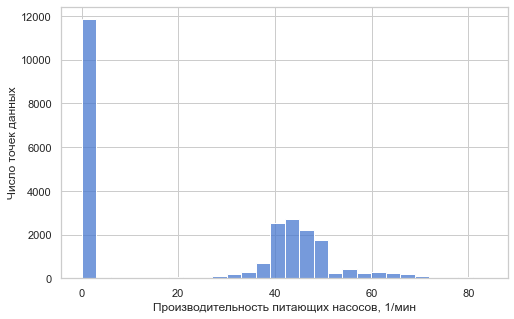

In [204]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(df['Fel_1']+df['Fel_2'], ax=ax)

ax.set_xlabel('Производительность питающих насосов, 1/мин')
ax.set_ylabel('Число точек данных')

plt.show();


Для порога оценки работы питающих насосов возьмем значение 20 шагов, будем сравнивать сумму двух насосов.

In [205]:
df = df.assign(work = np.where((df['Fel_1'] + df['Fel_2'] >= 20), 1, 0))

In [206]:
df.work.value_counts()

1    12473
0    11998
Name: work, dtype: int64

Создадим новый массив данных убрав простои автоклава.

In [207]:
df_work = df.drop(df[df['work'] == 0].index).drop('work', axis=1)

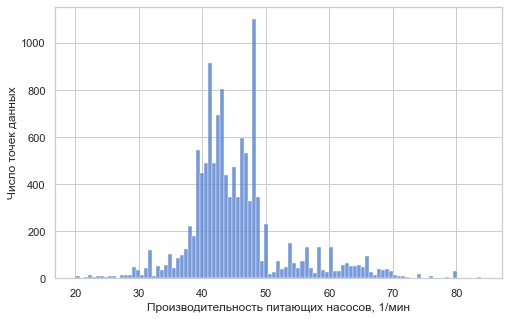

In [208]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(df_work['Fel_1']+df['Fel_2'], ax=ax)

ax.set_xlabel('Производительность питающих насосов, 1/мин')
ax.set_ylabel('Число точек данных')

plt.show();

Перейдем к пункту 2. Заполним недостающие строки по ХА.

In [209]:
int_cols = [
    'Fe',
    'Stot',
    'SO4',
    'As',
    'Corg',
    'Ctot',
    'D_S',
    'D_SL_H'
]

df_work[int_cols] = df_work.loc[:, int_cols].interpolate(method='time')
    

Сохраним полученный файл

In [210]:
comp = {
        'method': 'zip',
        'archive_name': 'out.csv'
    }

filepath = Path(f'./{WORK_DIR}/df_work_ds.zip')

df_work.to_csv(filepath, compression=comp)

Если мы не изменяем исходники, то просто загружаем файлик

In [211]:
df_work = pd.read_csv(f'{WORK_DIR}\df_work_ds.zip', index_col=0, parse_dates=True)

## Чистка данных для моделирования

Нужно добавить следующие данные:
   - Содержание твердого - C_S
   - Расход пульпы - Q_SL
   - Расход твердого - G_S
   - Расход серного эквивалента - G_Seq 
    
Константы:
   - Максимальная производительность насоса Feluwa 17,45 м³/ч
   - Максимальное число шагов 51
   - Мышьяк в СЭ - 0,371

In [212]:
FELUWA_MAX_Q = 17.45
FELUWA_MAX_N = 51
COEF_AS_SEQ = 0.371
D_WATER = 1000

In [213]:
fel_sum = df_work['Fel_1'] + df_work['Fel_2']

df_work = df_work.assign(Fel_sum = fel_sum.values)

In [214]:
df_work = df_work.assign(C_S = (df_work['D_S'] * D_WATER - df_work['D_SL_H'] * df_work['D_S']) / (df_work['D_SL_H'] * D_WATER - df_work['D_SL_H'] * df_work['D_S']) * 100)
df_work = df_work.assign(Q_SL = df_work['Fel_sum'] / FELUWA_MAX_N * FELUWA_MAX_Q)
df_work = df_work.assign(G_S = df_work['Q_SL'] * df_work['D_SL_H'] / 1000 * (df_work['C_S'] / 100))
df_work = df_work.assign(G_Seq = (COEF_AS_SEQ * df_work['As'] / 100 + df_work['Stot'] / 100) * df_work['G_S'])

В колонке SO4 много пропусков и нет доверия к анализу, уберем пока ее вообще.

In [215]:
df_work.drop('SO4', axis=1, inplace=True)

In [216]:
df_work.dropna(axis=0, inplace=True)

In [217]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12467 entries, 2019-03-15 19:00:00 to 2021-12-31 15:00:00
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fel_1          12467 non-null  float64
 1   Fel_2          12467 non-null  float64
 2   D_SL           12467 non-null  float64
 3   QQ_C1          12467 non-null  float64
 4   QQ_C2          12467 non-null  float64
 5   QQ_C3          12467 non-null  float64
 6   QQ_C4          12467 non-null  float64
 7   QQ_C5          12467 non-null  float64
 8   O2_tot         12467 non-null  float64
 9   QQ_tot         12467 non-null  float64
 10  Sl_tot         12467 non-null  float64
 11  O2_C1          12467 non-null  float64
 12  O2_C2          12467 non-null  float64
 13  O2_C3          12467 non-null  float64
 14  O2_C4          12467 non-null  float64
 15  O2_C5          12467 non-null  float64
 16  AC_level       12467 non-null  float64
 17  AC_rbk_open    

In [218]:
df_work.describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"12,467.00",20.55,19.84,0.00,0.00,25.00,41.39,49.28
Fel_2,"12,467.00",25.02,19.35,0.00,0.00,31.57,42.28,50.00
D_SL,"12,467.00","1,530.71",258.60,975.69,"1,585.60","1,637.97","1,677.01","1,841.55"
QQ_C1,"12,467.00",14.40,8.69,0.00,6.87,14.81,20.21,39.86
QQ_C2,"12,467.00",29.90,7.76,0.01,27.50,31.67,34.69,42.97
QQ_C3,"12,467.00",16.75,3.19,-0.00,15.50,17.37,18.96,23.01
QQ_C4,"12,467.00",5.10,3.12,-0.01,1.73,5.17,8.28,9.95
QQ_C5,"12,467.00",1.26,0.90,0.00,0.62,0.98,1.78,7.77
O2_tot,"12,467.00","5,525.13",772.86,-1.38,"5,106.91","5,444.94","5,874.54","7,550.74"
QQ_tot,"12,467.00",67.41,14.37,0.01,58.82,66.80,79.07,98.51


## Проведем анализ статистик признаков

### Целевой признак -$Fe^{2+}$ 

In [219]:
df_work['Fe2+'].describe()

count   12,467.00
mean         1.39
std          1.67
min          0.00
25%          0.56
50%          1.11
75%          1.74
max         45.40
Name: Fe2+, dtype: float64

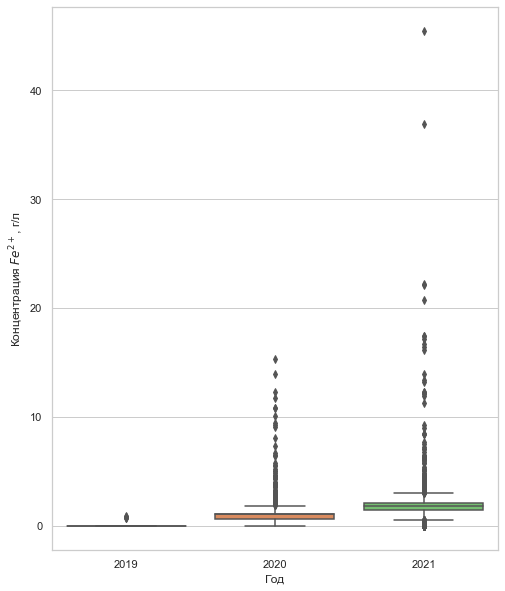

In [220]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.boxplot(data=df_work, y='Fe2+', x=df_work.index.year);

ax.set_xlabel('Год')
ax.set_ylabel('Концентрация $Fe^{2+}$, г/л')

plt.show();

In [221]:
df_work[df_work['Fe2+']>30]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2021-04-13 12:00:00,28.00,0.00,"1,002.14",13.00,17.92,14.49,6.22,1.58,"3,596.42",53.21,...,0.61,0.97,36.90,"3,900.00","1,597.92",28.00,50.32,9.58,7.70,2.26
2021-11-29 03:00:00,36.62,3.48,"1,635.90",12.21,14.19,8.36,5.94,0.97,"3,243.11",41.68,...,0.38,0.88,45.40,"3,900.00","1,614.67",40.09,51.19,13.72,11.34,2.84


In [222]:
df_work.loc['2021-04-13 6:00:00':'2021-04-13 18:00:00']


,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2021-04-13 06:00:00,0.00,50.00,"1,001.76",0.00,11.18,13.85,4.63,0.97,"4,257.63",30.63,...,0.61,0.97,0.30,"3,875.00","1,559.67",50.00,48.37,17.11,12.91,3.83
2021-04-13 07:00:00,0.00,50.00,"1,002.11",0.00,11.18,13.86,4.58,0.98,"4,252.24",30.59,...,0.61,0.97,0.30,"3,900.00","1,560.00",50.00,48.28,17.11,12.88,3.82
2021-04-13 08:00:00,0.00,50.00,"1,001.99",0.00,11.21,13.50,3.17,0.67,"4,232.64",28.54,...,0.61,0.97,0.23,"3,900.00","1,567.58",50.00,48.69,17.11,13.06,3.87
2021-04-13 09:00:00,0.00,50.00,"1,002.10",0.00,11.20,13.41,3.90,0.83,"4,201.70",29.34,...,0.61,0.97,0.25,"3,900.00","1,575.17",50.00,49.11,17.11,13.23,3.91
2021-04-13 10:00:00,0.00,50.00,"1,001.97",0.00,11.00,13.54,4.43,0.97,"4,219.12",29.95,...,0.61,0.97,0.31,"3,900.00","1,582.75",50.00,49.51,17.11,13.41,3.95
2021-04-13 11:00:00,5.51,19.22,"1,002.42",1.12,6.75,7.33,2.76,0.59,"2,230.72",18.55,...,0.61,0.97,0.34,"3,900.00","1,590.33",24.73,49.92,8.46,6.72,1.98
2021-04-13 12:00:00,28.00,0.00,"1,002.14",13.00,17.92,14.49,6.22,1.58,"3,596.42",53.21,...,0.61,0.97,36.90,"3,900.00","1,597.92",28.00,50.32,9.58,7.70,2.26
2021-04-13 13:00:00,35.33,0.00,"1,001.93",20.59,24.37,17.58,7.56,1.80,"5,114.70",71.89,...,0.60,0.97,8.41,"3,900.00","1,605.50",35.33,50.72,12.09,9.84,2.89
2021-04-13 14:00:00,36.58,0.00,"1,002.18",24.48,26.58,17.69,4.30,1.75,"5,556.76",74.81,...,0.60,0.97,0.80,"3,900.00","1,613.08",36.58,51.11,12.52,10.32,3.02
2021-04-13 15:00:00,37.04,0.00,"1,002.11",25.30,27.35,17.80,3.91,1.52,"5,573.80",75.88,...,0.60,0.97,0.85,"3,900.00","1,620.67",37.04,51.50,12.67,10.58,3.09


In [223]:
df_work.loc['2021-11-29 00:00:00':'2021-11-29 08:00:00']

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2021-11-29 03:00:00,36.62,3.48,"1,635.90",12.21,14.19,8.36,5.94,0.97,"3,243.11",41.68,...,0.38,0.88,45.40,"3,900.00","1,614.67",40.09,51.19,13.72,11.34,2.84
2021-11-29 04:00:00,26.66,26.63,"1,631.63",19.71,27.00,16.45,6.55,0.66,"5,238.98",70.37,...,0.37,0.87,9.00,"3,900.00","1,614.75",53.29,51.20,18.23,15.07,3.77
2021-11-29 05:00:00,25.92,25.90,"1,629.49",17.58,27.95,17.42,4.32,1.02,"5,646.40",68.29,...,0.36,0.87,2.74,"3,900.00","1,614.83",51.81,51.20,17.73,14.66,3.66
2021-11-29 06:00:00,26.53,26.53,"1,627.89",17.50,27.90,17.62,4.13,1.04,"5,651.55",68.19,...,0.35,0.87,0.95,"3,900.00","1,614.92",53.06,51.21,18.15,15.01,3.75
2021-11-29 07:00:00,25.89,25.89,"1,626.70",17.53,27.91,17.71,4.13,0.06,"5,650.82",67.34,...,0.34,0.86,0.78,"3,900.00","1,615.00",51.77,51.21,17.71,14.65,3.65
2021-11-29 08:00:00,26.50,26.50,"1,622.56",17.52,27.83,17.71,4.13,0.04,"5,650.86",67.22,...,0.34,0.86,0.80,"3,900.00","1,613.75",53.00,51.15,18.13,14.97,3.72


In [224]:
df_work.loc['2021-04-13 12:00:00', 'Fe2+'] = np.NaN
df_work.loc['2021-11-29 03:00:00', 'Fe2+'] = np.NaN

In [225]:
df_work['Fe2+'].interpolate(method='time', inplace=True)

(0.0, 23.0)

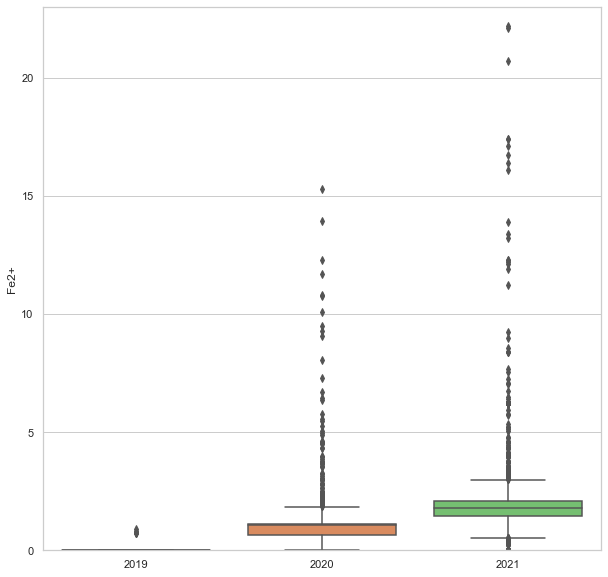

In [226]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(data=df_work, y='Fe2+', x=df_work.index.year, ax=ax);
ax.set_ylim(0, 23)

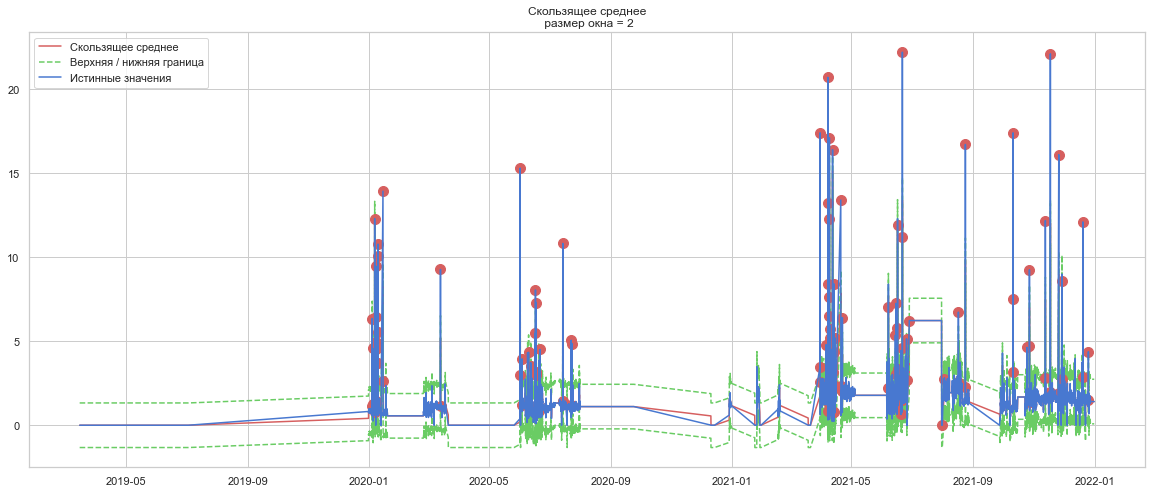

In [227]:
plotMovingAverage(df_work.loc[:, ['Fe2+']], window=2, plot_intervals=True, plot_anomalies=True, scale=3)

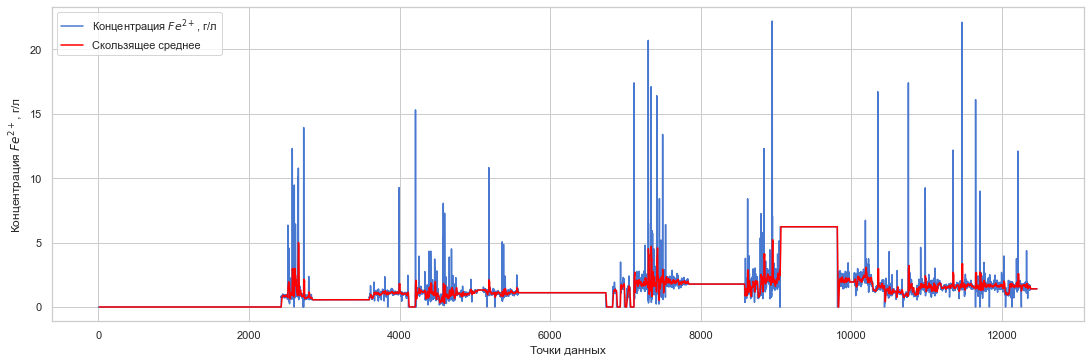

In [228]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['Fe2+'].values, label="Концентрация $Fe^{2+}$, г/л")

rolling_mean = df_work['Fe2+'].rolling(window=12).mean()
ax.plot(rolling_mean.values, c='red', label="Скользящее среднее")

f.tight_layout();

ax.set_ylabel('Концентрация $Fe^{2+}$, г/л')
ax.set_xlabel('Точки данных')

plt.legend()
plt.show();

In [229]:
df_work.loc[df_work['Fe2+'] > 10, :]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2020-01-06 22:00:00,0.00,48.40,"1,646.18",5.67,34.63,17.33,4.81,1.80,"5,636.82",64.25,...,0.85,1.73,12.30,"3,820.00","1,611.25",48.40,51.39,16.56,13.71,3.72
2020-01-06 23:00:00,0.00,47.83,"1,649.23",5.67,34.43,17.54,4.93,1.80,"5,715.37",64.38,...,0.85,1.73,11.70,"3,820.00","1,610.67",47.83,51.36,16.37,13.54,3.68
2020-01-10 02:00:00,0.00,48.39,"1,658.23",5.11,32.07,18.52,1.90,2.82,"5,881.92",60.41,...,0.56,1.52,10.07,"3,820.00","1,633.75",48.39,52.55,16.56,14.21,3.63
2020-01-10 07:00:00,0.00,48.42,"1,654.99",3.95,33.05,18.98,1.57,1.19,"5,951.02",58.74,...,0.51,1.55,10.78,"3,820.00","1,630.00",48.42,52.36,16.57,14.14,3.61
2020-01-15 07:00:00,0.00,27.18,"1,611.44",3.77,17.56,7.80,0.65,1.21,"3,236.81",31.00,...,0.76,1.67,13.93,"3,820.00","1,636.50",27.18,52.69,9.30,8.02,2.07
2020-06-01 12:00:00,0.00,42.88,"1,647.08",11.32,27.04,16.03,1.47,2.21,"4,017.59",58.07,...,0.47,1.16,15.30,"3,923.59","1,573.80",42.88,48.93,14.67,11.30,3.43
2020-07-14 10:00:00,27.19,0.00,"1,613.52",4.21,25.31,4.11,0.64,0.95,"3,755.98",35.22,...,0.75,0.87,10.82,"3,920.00","1,651.75",27.19,52.97,9.30,8.14,2.58
2021-03-30 12:00:00,37.22,0.00,"1,001.73",21.71,29.31,17.88,8.67,2.96,"5,429.29",80.54,...,0.57,0.98,17.40,"3,900.00","1,791.08",37.22,59.40,12.73,13.55,4.17
2021-04-07 08:00:00,31.61,0.00,"1,001.73",23.13,22.12,13.97,4.65,2.62,"4,422.14",66.49,...,0.54,1.01,13.20,"3,600.00","1,764.17",31.61,59.98,10.82,11.44,3.39
2021-04-07 09:00:00,32.00,0.00,"1,001.74",21.84,23.58,14.68,4.99,2.35,"4,432.61",67.44,...,0.54,1.02,20.70,"3,600.00","1,765.33",32.00,60.03,10.95,11.60,3.44


In [230]:
df_work.loc[df_work['Fe2+'] == 0, :]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2019-03-15 19:00:00,47.45,0.00,"1,327.49",5.18,22.13,10.13,0.99,0.14,"3,598.45",38.57,...,0.53,1.16,0.00,"3,900.00","1,396.67",47.45,38.19,16.23,8.66,2.70
2019-03-15 20:00:00,47.44,0.00,"1,336.26",5.07,21.95,10.82,1.88,0.33,"3,602.26",40.05,...,0.53,1.16,0.00,"3,900.00","1,396.67",47.44,38.19,16.23,8.66,2.70
2019-03-15 21:00:00,47.42,0.00,"1,338.40",5.26,22.05,11.37,2.56,0.34,"3,625.46",41.58,...,0.53,1.17,0.00,"3,900.00","1,396.67",47.42,38.19,16.23,8.66,2.69
2019-03-15 22:00:00,47.43,0.00,"1,348.85",5.70,22.46,11.69,2.81,0.13,"3,696.15",42.79,...,0.53,1.17,0.00,"3,900.00","1,396.67",47.43,38.19,16.23,8.66,2.68
2019-03-15 23:00:00,47.45,0.00,"1,356.97",6.36,23.09,12.14,3.03,0.42,"3,788.60",45.03,...,0.53,1.17,0.00,"3,900.00","1,396.67",47.45,38.19,16.24,8.66,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28 07:00:00,18.52,16.97,"1,626.55",12.02,17.04,9.92,2.58,0.34,"3,261.65",41.89,...,0.60,0.94,0.00,"3,900.00","1,613.00",35.49,51.11,12.14,10.01,2.57
2021-12-04 08:00:00,31.48,0.00,"1,673.00",12.04,19.78,12.54,3.52,0.29,"3,653.54",48.18,...,0.48,1.24,0.00,"3,900.00","1,568.00",31.48,48.72,10.77,8.23,2.11
2021-12-13 07:00:00,20.11,20.13,"1,665.23",15.51,23.31,13.43,5.26,0.53,"4,873.77",58.04,...,0.35,0.94,0.00,"3,900.00","1,568.00",40.24,48.72,13.77,10.52,2.51
2021-12-16 23:00:00,14.26,14.27,"1,001.74",8.82,14.53,7.86,3.13,0.32,"2,836.09",34.66,...,0.33,0.87,0.00,"3,900.00","1,568.00",28.53,48.72,9.76,7.46,1.79


In [231]:
df_work.loc[df_work['Fe2+'] == 6.23, :]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2021-06-28 07:00:00,0.00,36.59,"1,293.14",21.38,31.28,18.18,7.52,1.85,"5,284.85",80.21,...,0.57,1.17,6.23,"3,800.00","1,798.33",36.59,60.25,12.52,13.56,4.02
2021-06-28 08:00:00,0.00,38.00,"1,716.92",21.10,32.40,19.00,8.36,1.81,"5,316.13",82.67,...,0.57,1.17,6.23,"3,800.00","1,798.64",38.00,60.26,13.00,14.09,4.18
2021-06-28 09:00:00,0.00,36.11,"1,712.94",21.05,32.31,18.97,8.42,1.74,"5,322.08",82.49,...,0.57,1.17,6.23,"3,800.00","1,798.94",36.11,60.27,12.36,13.40,3.97
2021-06-28 10:00:00,0.00,34.45,"1,708.93",21.10,30.80,18.91,7.57,0.96,"5,315.80",79.34,...,0.57,1.17,6.23,"3,800.00","1,799.25",34.45,60.29,11.79,12.79,3.79
2021-06-28 11:00:00,0.00,33.36,"1,706.62",21.14,28.68,18.71,5.72,1.08,"5,317.68",75.32,...,0.57,1.17,6.23,"3,800.00","1,799.56",33.36,60.30,11.42,12.39,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30 17:00:00,45.00,0.00,"1,749.86",18.63,35.43,18.57,9.10,1.52,"5,836.47",83.26,...,0.62,0.88,6.23,"4,200.00","1,817.50",45.00,59.04,15.40,16.52,4.62
2021-07-30 18:00:00,45.00,0.00,"1,748.86",18.64,35.42,18.56,9.10,1.52,"5,836.07",83.25,...,0.62,0.88,6.23,"4,200.00","1,817.75",45.00,59.05,15.40,16.53,4.62
2021-07-30 19:00:00,45.00,0.00,"1,748.84",18.63,35.41,18.56,9.10,1.51,"5,836.79",83.21,...,0.62,0.88,6.23,"4,200.00","1,818.00",45.00,59.06,15.40,16.53,4.62
2021-07-30 20:00:00,45.00,0.00,"1,634.31",18.61,35.40,18.56,9.10,1.50,"5,836.92",83.17,...,0.62,0.88,6.23,"4,200.00","1,816.58",45.00,59.00,15.40,16.50,4.61


In [232]:
df_work.loc[df_work['Fe2+'] == 0, :]
df_work.loc[df_work['Fe2+'] == 0, :]= df.replace(0, np.nan)
df_work.loc[df_work['Fe2+'] == 0, :]= df.dropna(how='all', axis=0)

In [233]:
df_work.loc[df_work['Fe2+'] == 6.23, :]
df_work.loc[df_work['Fe2+'] == 6.23, :]= df.replace(6.23, np.nan)
df_work.loc[df_work['Fe2+'] == 6.23, :]= df.dropna(how='all', axis=0)

Оставшиеся выбросы не будем пока убирать, так как это могут быть технологические отклонения. Посмотрим как они будут описываться моделью.

In [234]:
less_one = df_work.loc[df_work['Fe2+'] <= 1, ['Fe2+']].count()
one_two = df_work.loc[(df_work['Fe2+'] > 1) & (df_work['Fe2+'] <= 2), ['Fe2+']].count()
more_two = df_work.loc[df_work['Fe2+'] > 2, ['Fe2+']].count()

print(less_one.values, one_two.values, more_two.values)

[2115] [5976] [836]


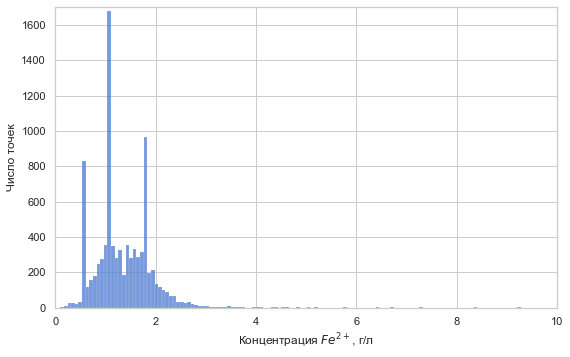

In [235]:

f, ax = plt.subplots(figsize=(8, 5))

sns.histplot(df_work['Fe2+'], ax=ax)

f.tight_layout();

ax.set_xlabel('Концентрация $Fe^{2+}$, г/л')
ax.set_ylabel('Число точек')

ax.set_ylim(0, 1700)
ax.set_xlim(0, 10)

plt.show();

### Анализ состава исходного сырья

Выделим нужные колонки и посмотрим на распределения данных.

В химическом анализе из баков питания могут быть выбросы или неправильные значения. В какие-то дни анализы могут быть неполными. Проверим по $Fe$ и $S_{tot}$.

In [236]:
df_work.loc[(df_work['Fe'] <= 10) & (df_work['Stot'] <= 10), ['Fe', 'Stot']].count()

Fe      0
Stot    0
dtype: int64

In [237]:
int_cols = [
    'Fe',
    'Stot',
    'As',
    'Corg',
    'Ctot'
]

df_work[int_cols].describe()

,Fe,Stot,As,Corg,Ctot
count,"9,131.00","9,144.00","9,133.00","9,143.00","9,144.00"
mean,27.57,26.05,7.29,0.54,1.02
std,3.74,2.32,1.69,0.37,0.23
min,11.27,19.10,2.85,0.11,0.48
25%,24.98,24.62,6.21,0.41,0.89
50%,27.82,26.77,7.60,0.49,0.97
75%,29.90,27.50,8.45,0.67,1.13
max,37.56,33.30,14.50,11.61,2.02


Посмотрим на анализ органического углерода, судя по исходному распределению, там есть выбросы и/или ошибки. Проверим точки где органического углерода по анализу больше общего. Попробуем приравнять в таких точках значение органического углерода к общему.

In [238]:
df_work.loc[df_work['Corg'] > df_work['Ctot'], 'Corg'] = df_work.loc[df_work['Corg'] > df_work['Ctot'], 'Ctot']

In [239]:
df_work.loc[df_work['Corg'] > df_work['Ctot']].count().sum()

0

In [240]:
df_work[int_cols].describe()

,Fe,Stot,As,Corg,Ctot
count,"9,131.00","9,144.00","9,133.00","9,143.00","9,144.00"
mean,27.57,26.05,7.29,0.53,1.02
std,3.74,2.32,1.69,0.17,0.23
min,11.27,19.10,2.85,0.11,0.48
25%,24.98,24.62,6.21,0.41,0.89
50%,27.82,26.77,7.60,0.49,0.97
75%,29.90,27.50,8.45,0.67,1.13
max,37.56,33.30,14.50,1.06,2.02


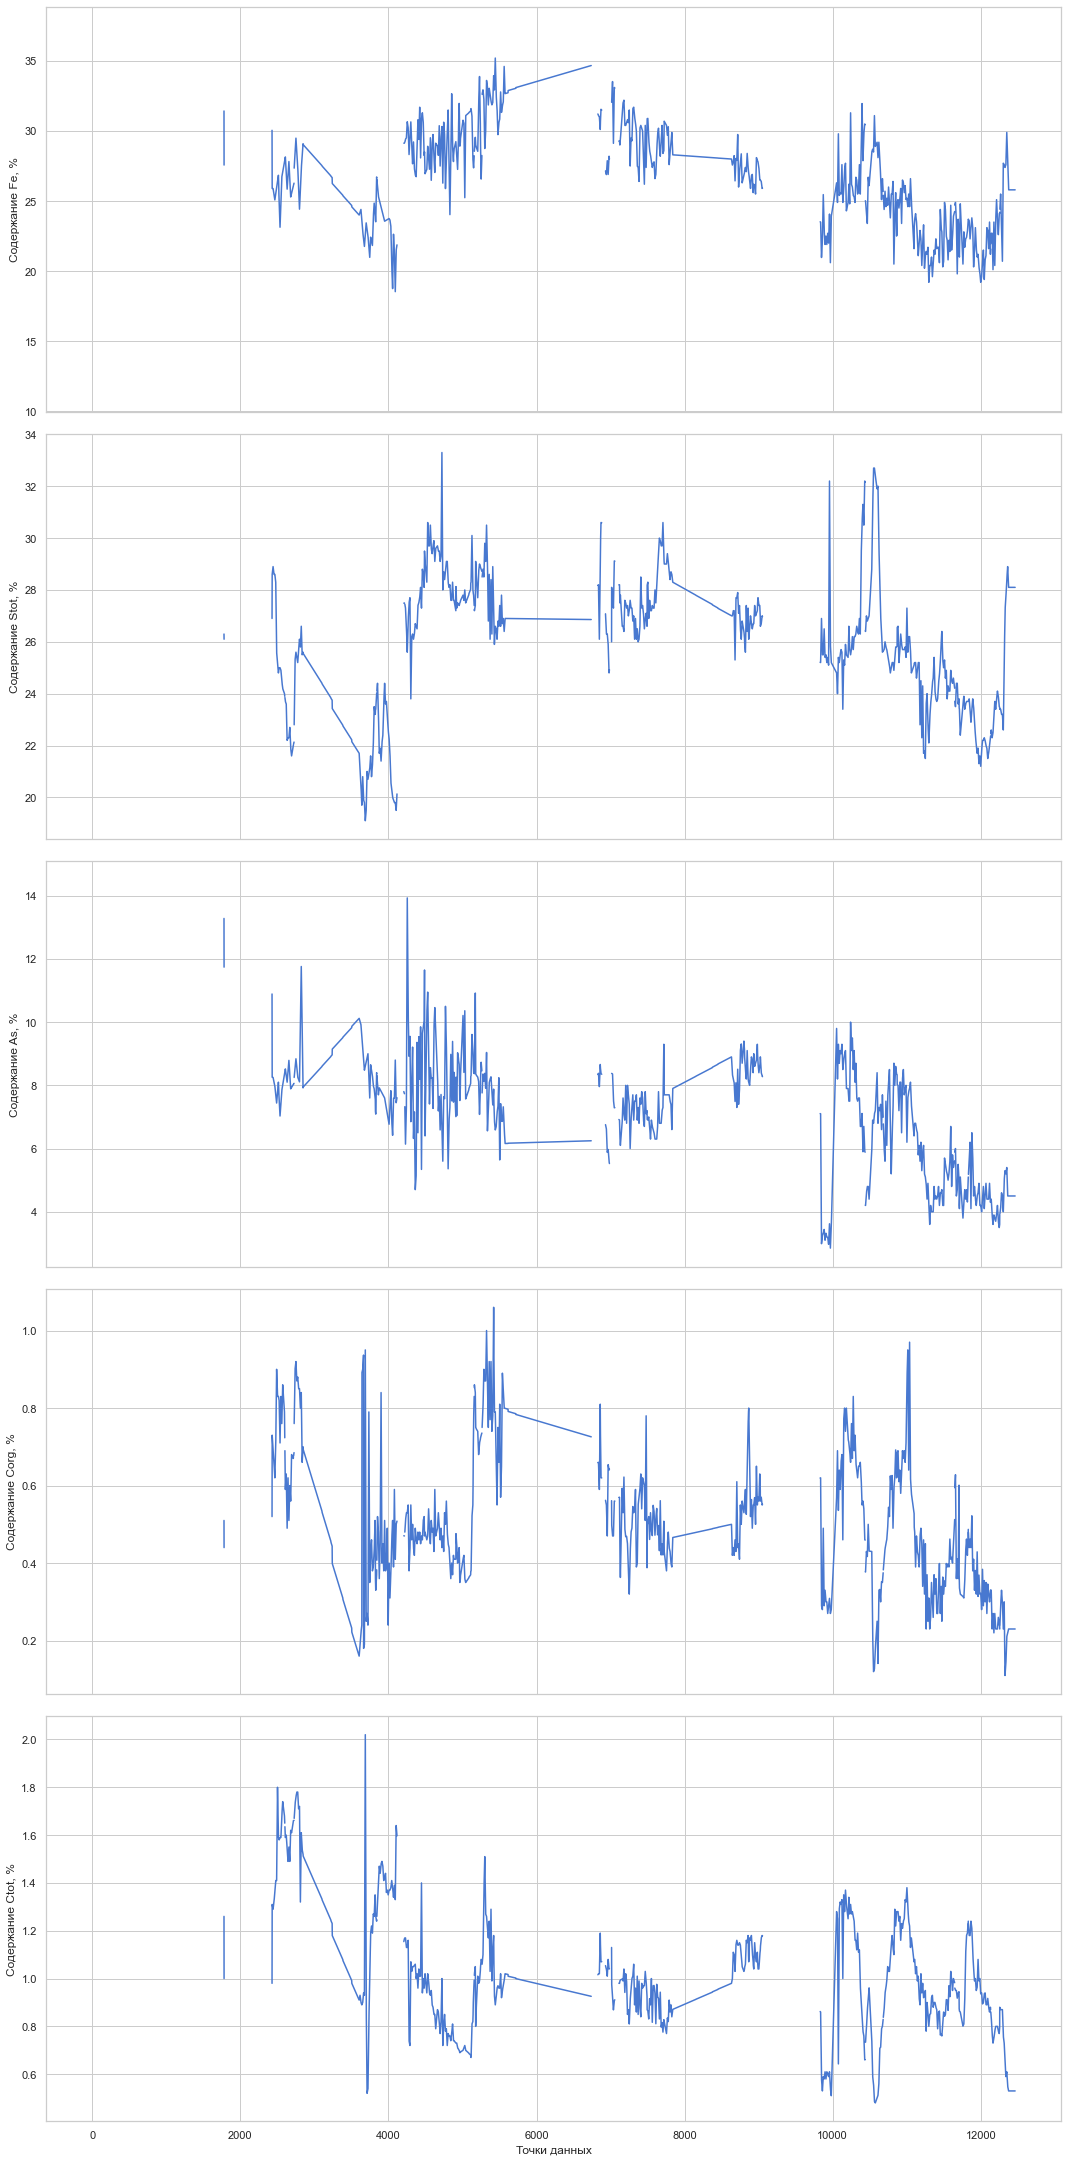

In [241]:
f, ax = plt.subplots(5, 1, figsize=(15,30), sharex=True)

for i, col in enumerate(int_cols):
    ax[i].plot(df_work[col].values)
    ax[i].set_ylabel(f'Содержание {col}, %')

f.tight_layout();

ax[4].set_xlabel('Точки данных')

plt.show();

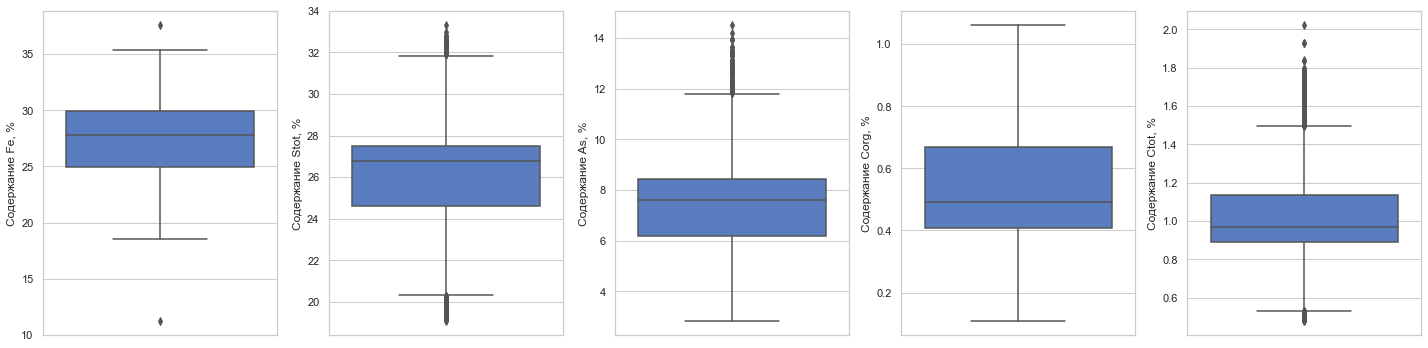

In [242]:
f, ax = plt.subplots(1, 5, figsize=(20,5))

for i, col in enumerate(int_cols):
    sns.boxplot(data=df_work, y=col, ax=ax[i])
    ax[i].set_ylabel(f'Содержание {col}, %')

f.tight_layout();

plt.show();

## Анализ данных работы автоклава

Насосы питания

In [243]:
df[['Fel_1', 'Fel_2']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"24,471.00",10.51,17.49,0.00,0.00,0.00,26.07,49.28
Fel_2,"24,471.00",12.79,18.62,0.00,0.00,0.00,32.00,50.00


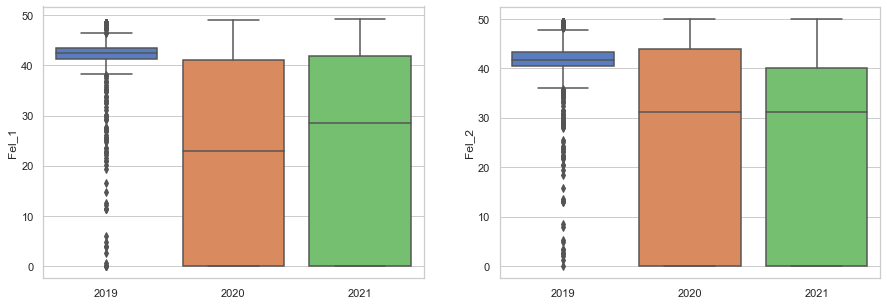

In [244]:
f, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df_work, y='Fel_1', ax=axs[0], x=df_work.index.year);
sns.boxplot(data=df_work, y='Fel_2', ax=axs[1], x=df_work.index.year);

Достаточно часто используемый в стаистике график, описывающий распределение параметра. Предполагается что распределение параметра носит нормальных характер. Описание графика boxplot:

<img src=".\working_data\Boxplot_vs_PDF.svg.png" width=30%>

*источник картинки wikipedia*



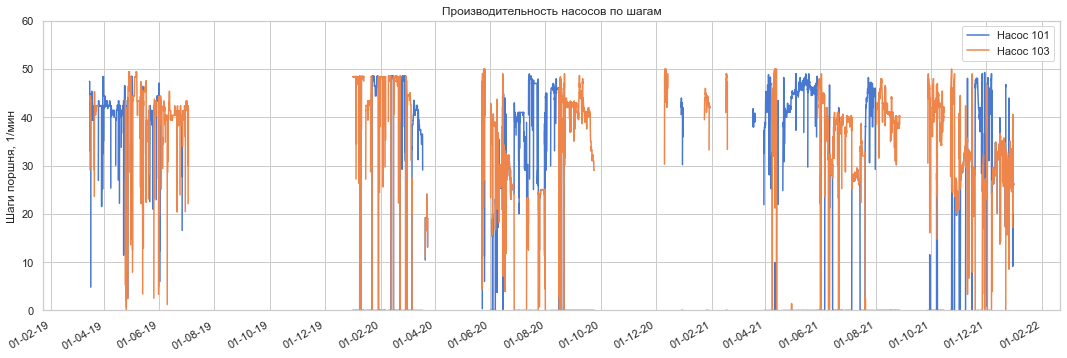

In [245]:
f, ax = plt.subplots(figsize=(15,5))

plt.plot(df_work['Fel_1'].resample('H').first().fillna(value=np.nan))
plt.plot(df_work['Fel_2'].resample('H').first().fillna(value=np.nan))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_ylim([0, 60])
ax.legend(['Насос 101', 'Насос 103'])

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Производительность насосов по шагам')
ax.set_ylabel('Шаги поршня, 1/мин')

plt.show()

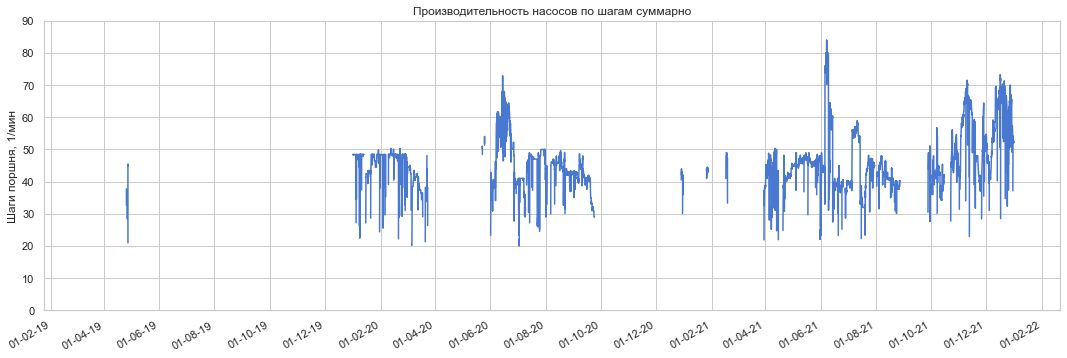

In [246]:
f, ax = plt.subplots(figsize=(15,5))

fel_sum = df_work['Fel_1'] + df_work['Fel_2']

plt.plot(fel_sum.resample('H').first().fillna(value=np.nan))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_ylim([0, 90])

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Производительность насосов по шагам суммарно')
ax.set_ylabel('Шаги поршня, 1/мин')

plt.show();

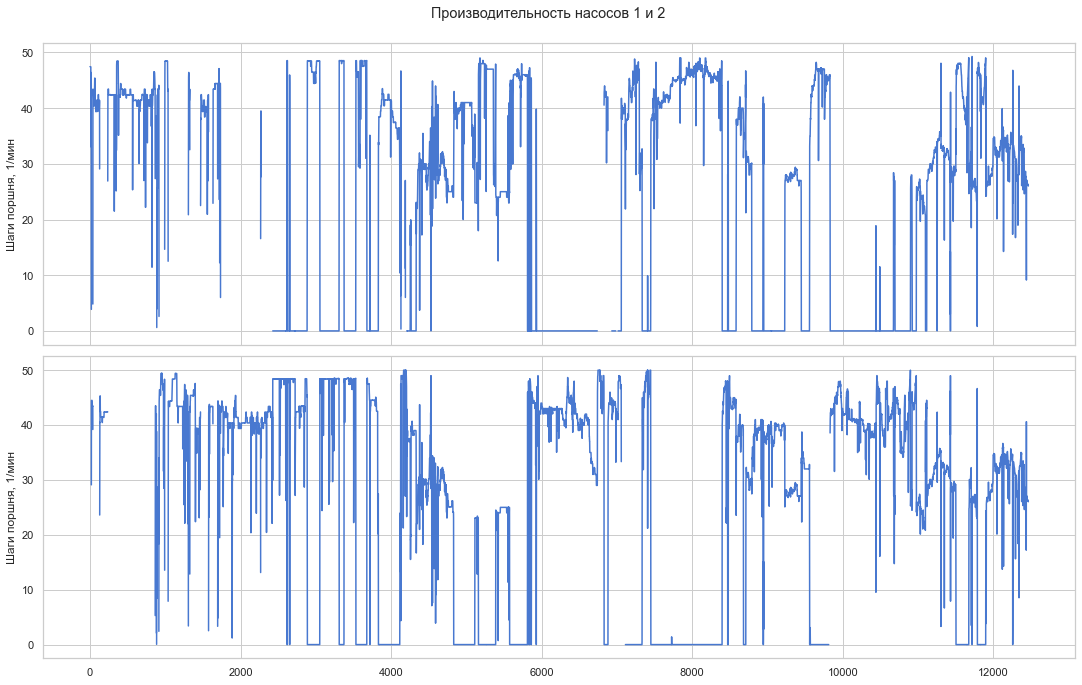

In [248]:
f, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

ax[0].plot(df_work['Fel_1'].values)
ax[1].plot(df_work['Fel_2'].values)

f.tight_layout();

st = f.suptitle('Производительность насосов 1 и 2')
st.set_y(0.95)
f.subplots_adjust(top=0.9)

ax[0].set_ylabel('Шаги поршня, 1/мин')
ax[1].set_ylabel('Шаги поршня, 1/мин')

plt.show();

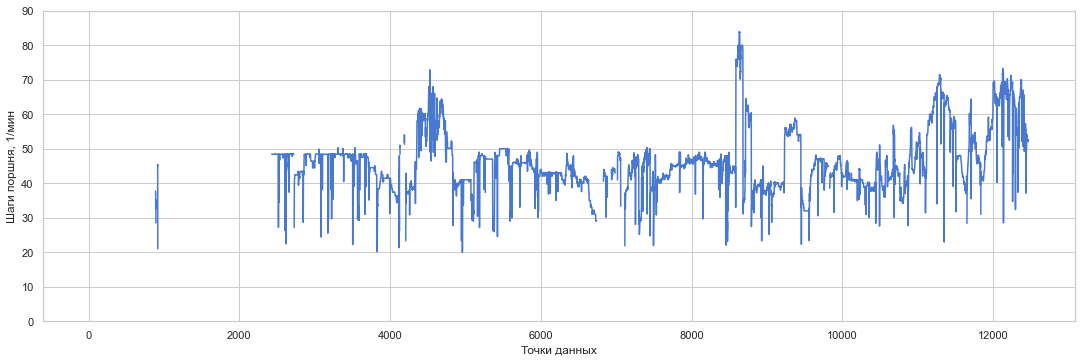

In [249]:
f, ax = plt.subplots(figsize=(15,5))

plt.plot(fel_sum.values)

ax.set_ylim([0, 90])

f.tight_layout();

ax.set_ylabel('Шаги поршня, 1/мин')
ax.set_xlabel('Точки данных')

plt.show();

### Плотность пульпы

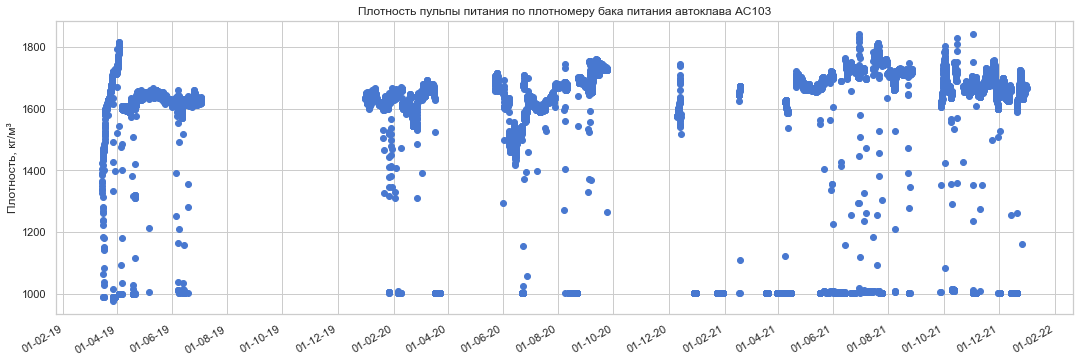

In [250]:
f, ax = plt.subplots(figsize=(15,5))

ax.scatter(df_work.index, df_work['D_SL'])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Плотность пульпы питания по плотномеру бака питания автоклава АС103')
ax.set_ylabel('Плотность, кг/м³')

plt.show();

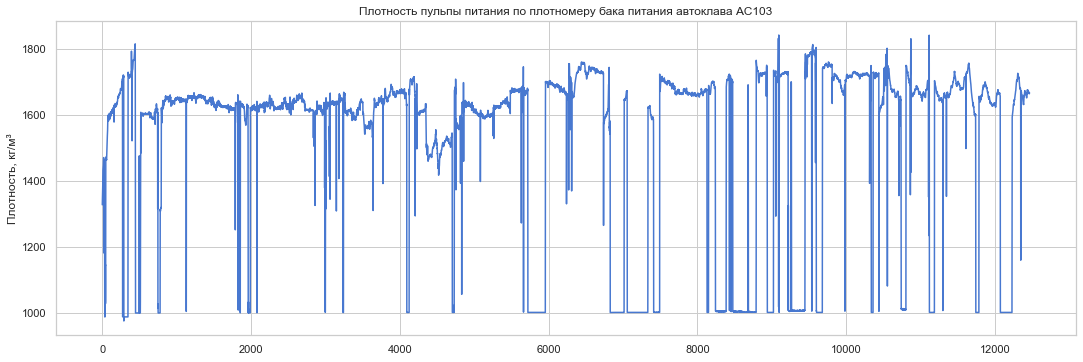

In [251]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['D_SL'].values)

f.tight_layout();

ax.set_title('Плотность пульпы питания по плотномеру бака питания автоклава АС103')
ax.set_ylabel('Плотность, кг/м³')

plt.show()

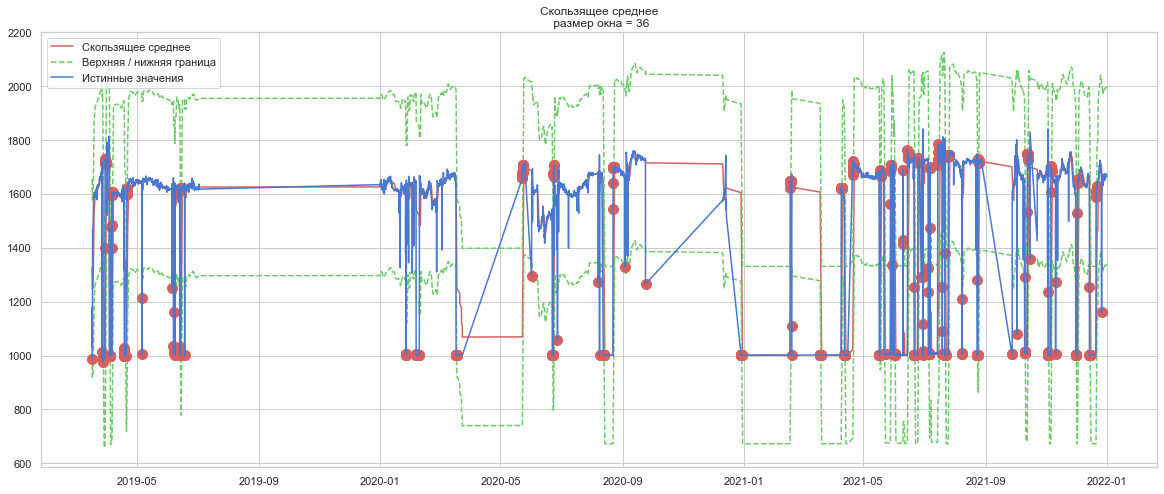

In [252]:
plotMovingAverage(df_work.loc[:, ['D_SL']], window=36, plot_intervals=True, plot_anomalies=True)

Разброс параметра большой. Скорее всего нужно будет корректировать по результатам ручных замеров.

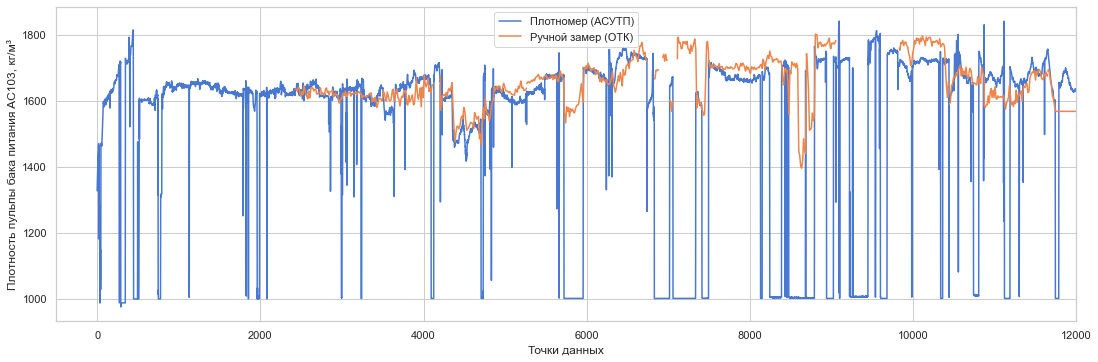

In [253]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['D_SL'].values, label="Плотномер (АСУТП)")
ax.plot(df_work['D_SL_H'].values, label="Ручной замер (ОТК)")

f.tight_layout();

ax.set_ylabel('Плотность пульпы бака питания AC103, кг/м³')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12000)

plt.legend()

plt.show();

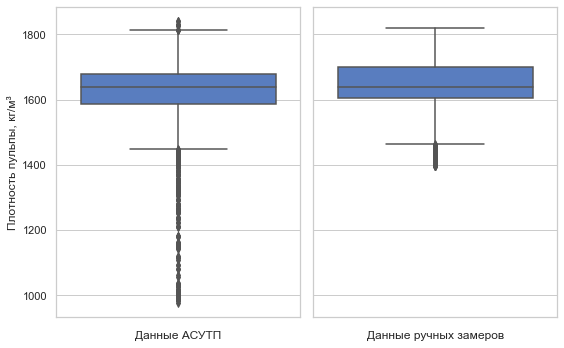

In [254]:
f, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

sns.boxplot(data=df_work, y='D_SL', ax=axs[0])
axs[0].set_ylabel('Плотность пульпы, кг/м³')
axs[0].set_xlabel('Данные АСУТП')

sns.boxplot(data=df_work, y='D_SL_H', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_xlabel('Данные ручных замеров')

f.tight_layout()

plt.show()

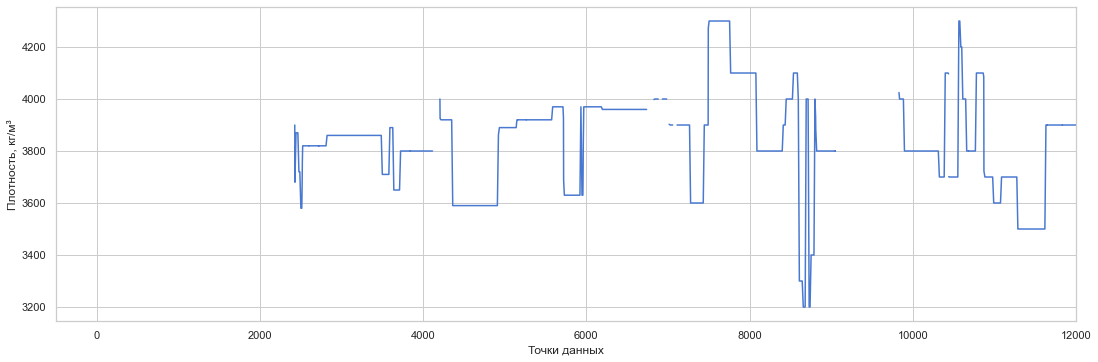

In [255]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['D_S'].values)

f.tight_layout();


ax.set_ylabel('Плотность, кг/м³')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12000)

plt.show();

### Расход воды по секциям и общий расход

In [256]:
QQ_cols = [
    'QQ_C1',
    'QQ_C2',
    'QQ_C3',
    'QQ_C4',
    'QQ_C5',
    'QQ_tot',
]

In [257]:
df_work[QQ_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
QQ_C1,"12,369.00",14.51,8.63,0.00,7.22,14.88,20.23,39.86
QQ_C2,"12,467.00",29.90,7.76,0.01,27.50,31.67,34.69,42.97
QQ_C3,"12,458.00",16.76,3.16,-0.00,15.51,17.38,18.97,23.01
QQ_C4,"12,467.00",5.10,3.12,-0.01,1.73,5.17,8.28,9.95
QQ_C5,"12,256.00",1.28,0.89,0.00,0.63,1.02,1.79,7.77
QQ_tot,"12,467.00",67.41,14.37,0.01,58.82,66.80,79.07,98.51


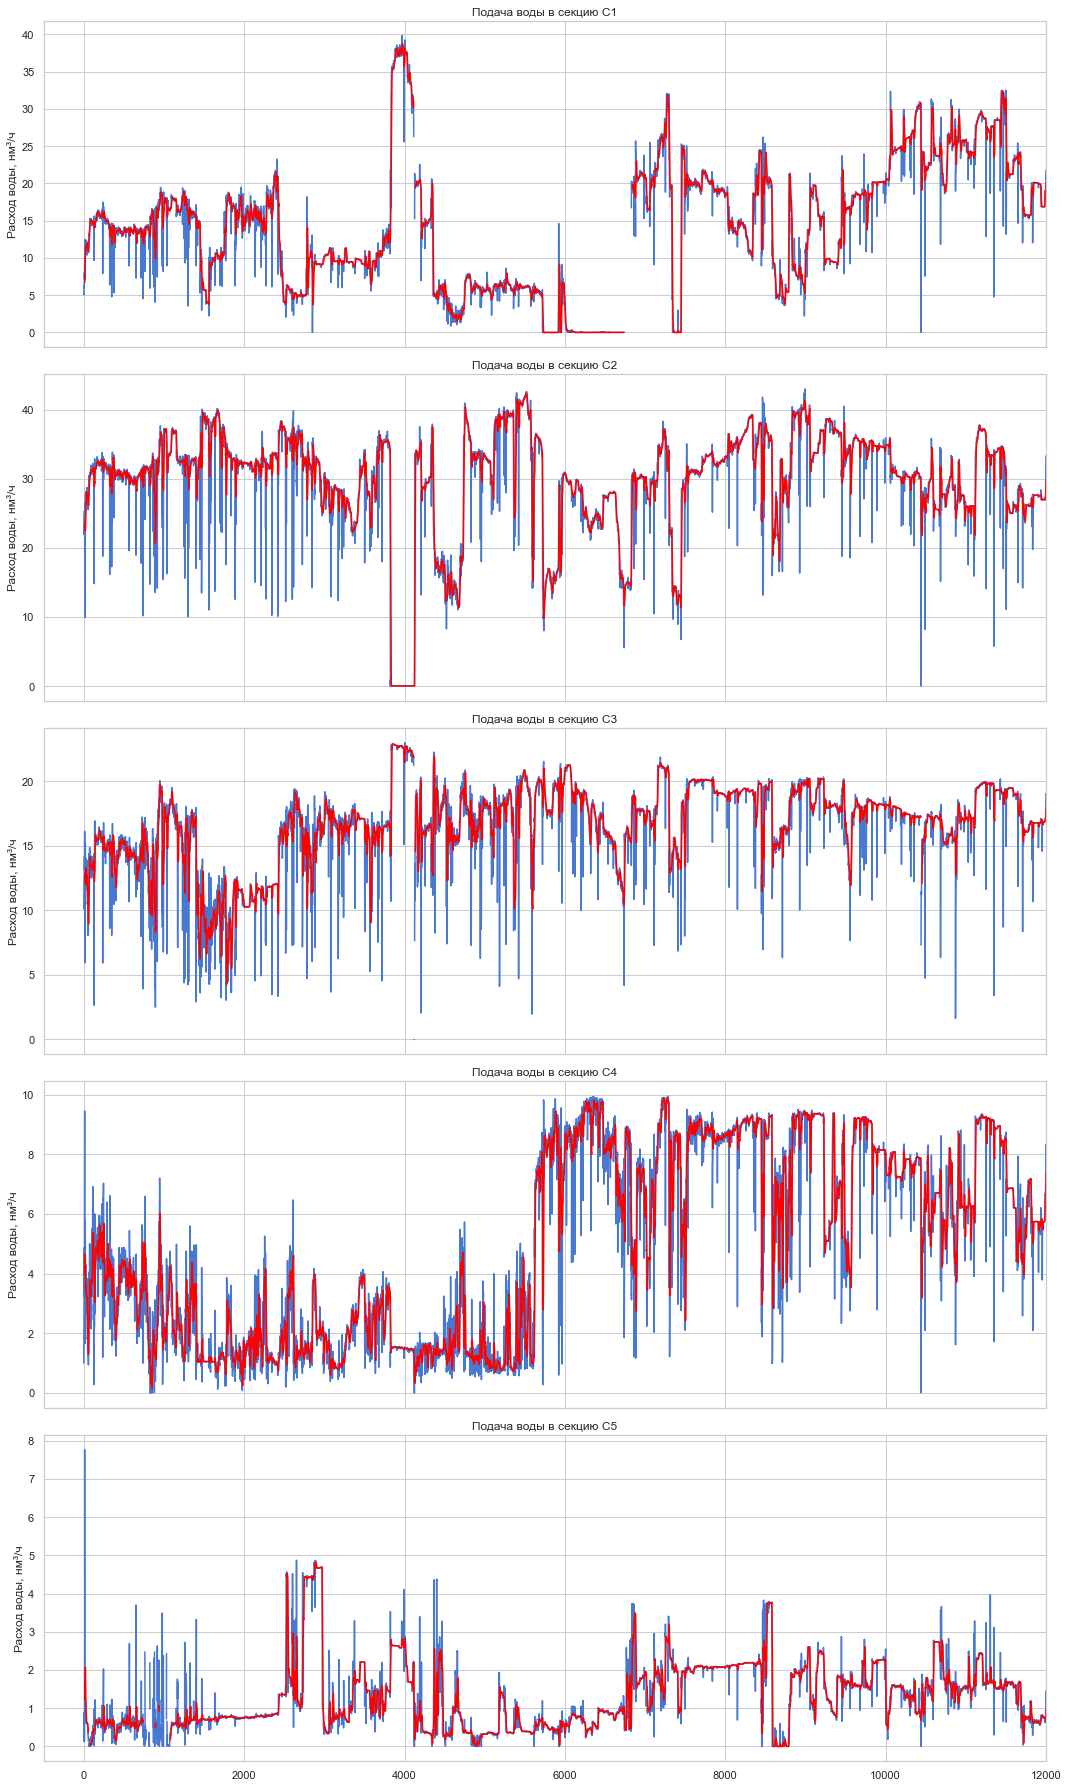

In [258]:
f, ax = plt.subplots(5, 1, figsize=(15,25), sharex=True)

for i, col in enumerate(QQ_cols[:-1]):
    ax[i].plot(df_work[col].values)
    rolling_mean = df_work[col].rolling(window=12).mean()
    ax[i].plot(rolling_mean.values, c='red')
    ax[i].set_title(f'Подача воды в секцию {col[-2:]}')
    ax[i].set_ylabel('Расход воды, нм³/ч')

ax[4].set_xlim(-500, 12000)

f.tight_layout();

plt.show();

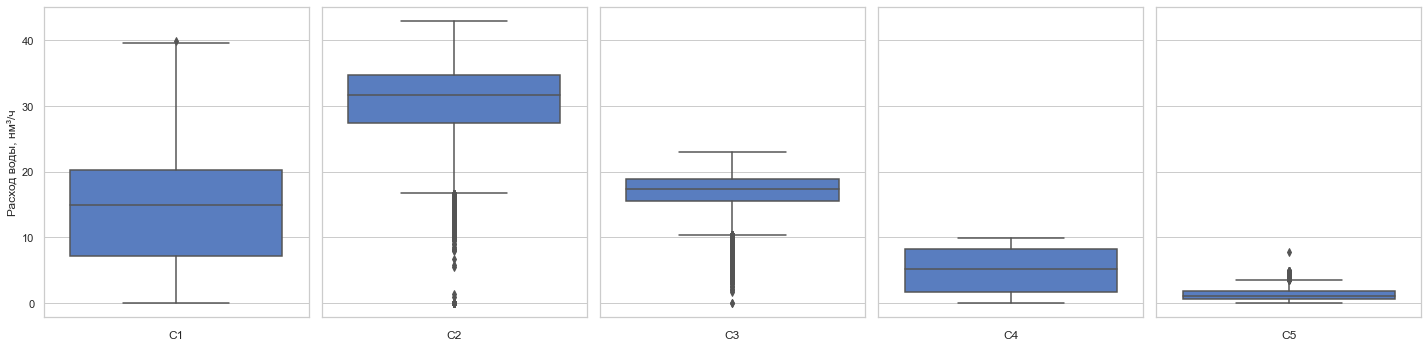

In [259]:
f, ax = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, col in enumerate(QQ_cols[:-1]):
    sns.boxplot(data=df_work, y=col, ax=ax[i])
    ax[i].set_ylabel('')
    ax[0].set_ylabel('Расход воды, нм³/ч')
    ax[i].set_xlabel(col[-2:])

f.tight_layout();

plt.show();

### Температура

In [260]:
T_cols = [
    'T_C1',
    'T_C2',
    'T_C3',
    'T_C4',
    'T_C5',
    'T_abg'
]

In [261]:
df_work[T_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
T_C1,"12,467.00",216.20,13.38,24.00,209.39,222.76,224.97,231.34
T_C2,"12,467.00",219.06,10.93,24.23,215.81,224.04,225.01,247.29
T_C3,"12,467.00",222.92,8.42,23.47,222.98,224.83,225.30,232.90
T_C4,"12,467.00",221.89,9.33,22.52,221.66,224.51,225.34,238.33
T_C5,"12,467.00",195.60,23.12,21.89,182.30,195.88,216.22,229.03
T_abg,"12,467.00",223.65,2.41,59.84,222.62,223.82,224.94,230.73


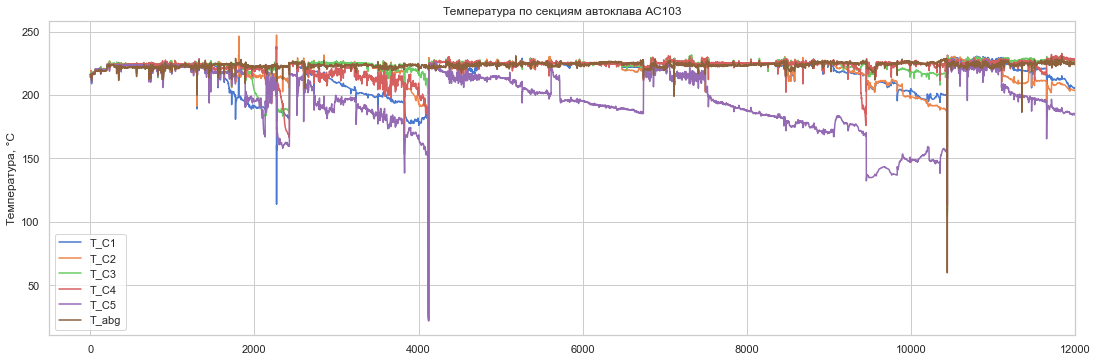

In [262]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols:
    ax.plot(df_work[col].values)

f.tight_layout();

ax.set_title('Температура по секциям автоклава АС103')
ax.set_ylabel('Температура, °С')
ax.set_xlim(-500, 12000)

ax.legend(T_cols)

plt.show();

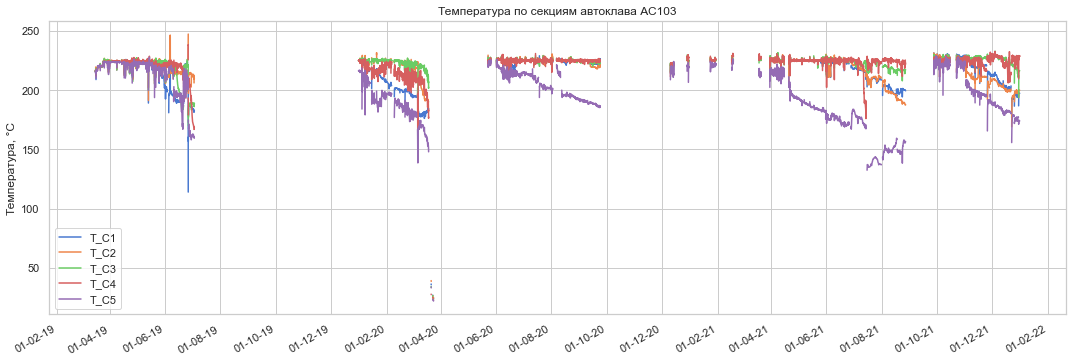

In [263]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols[:-1]:
    ax.plot(df_work[col].resample('H').first().fillna(value=np.nan))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Температура по секциям автоклава АС103')
ax.set_ylabel('Температура, °С')

ax.legend(T_cols[:-1])

plt.show();

Посмотрим где температура не отличается от 225 °С более чем на 10 градусов.

In [264]:
for col in T_cols[:-1]:
    delta = 5
    print(f'Для секции {col} значений с разницей меньше {delta} °С: {df_work.loc[(-df_work[col] + 225) <=delta, [col]].count()[0]}')

Для секции T_C1 значений с разницей меньше 5 °С: 7424
Для секции T_C2 значений с разницей меньше 5 °С: 8323
Для секции T_C3 значений с разницей меньше 5 °С: 10713
Для секции T_C4 значений с разницей меньше 5 °С: 10114
Для секции T_C5 значений с разницей меньше 5 °С: 2092


Получается что хуже всего температура измеряется в секциях c 1 по 4. Там меньше половины точек больше 220 °С.

#### Взаимосвязь воды и температуры

Выберем те данные в которых температура по секциям была выше 220 °С. По всем секциям.

In [265]:
df_corr_T_QQ = df_work.loc[
    (df_work["T_C1"] >= 220)
    & (df_work["T_C2"] >= 220)
    & (df_work["T_C3"] >= 220)
    & (df_work["T_C4"] >= 220)
    & (df_work["T_C5"] >= 220),
    T_cols + QQ_cols[:-1],
]

In [266]:
df_corr_T_QQ.describe().T

,count,mean,std,min,25%,50%,75%,max
T_C1,"2,052.00",225.30,2.05,220.01,223.99,224.12,226.73,230.58
T_C2,"2,052.00",225.05,1.81,220.01,224.00,224.12,225.51,230.47
T_C3,"2,052.00",225.03,1.61,220.01,223.99,224.34,225.96,230.14
T_C4,"2,052.00",224.75,1.52,220.00,223.95,224.20,225.52,231.02
T_C5,"2,052.00",222.64,1.37,220.00,221.64,222.72,223.63,229.03
T_abg,"2,052.00",222.75,1.42,216.84,221.81,222.48,223.49,228.11
QQ_C1,"2,050.00",18.11,4.55,4.71,14.25,16.68,21.35,31.34
QQ_C2,"2,052.00",30.65,3.20,13.79,28.77,30.80,32.66,39.82
QQ_C3,"2,052.00",15.92,2.01,4.69,14.87,16.08,17.32,20.33
QQ_C4,"2,052.00",4.13,2.02,-0.00,2.49,4.06,5.80,8.91


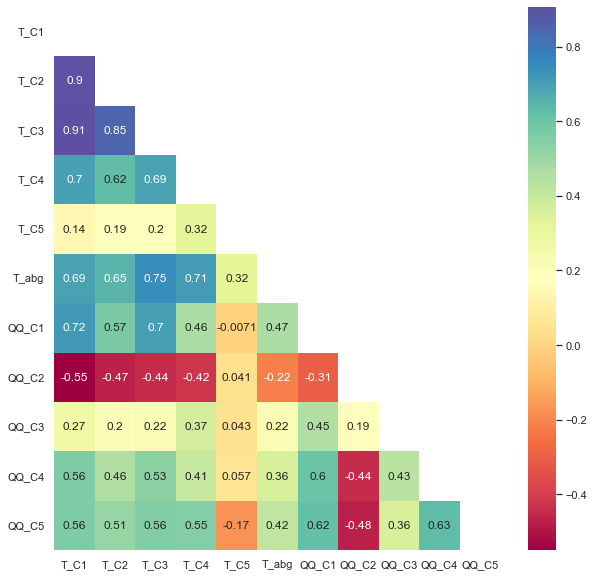

In [267]:
corr = df_corr_T_QQ.corr()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Spectral', mask=mask);
plt.yticks(rotation=0)
plt.show()

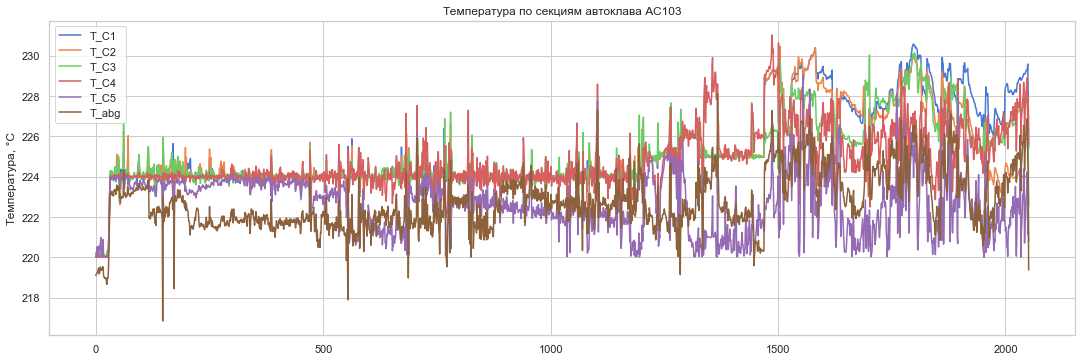

In [268]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols:
    ax.plot(df_corr_T_QQ[col].values)

f.tight_layout();

ax.set_title('Температура по секциям автоклава АС103')
ax.set_ylabel('Температура, °С')

ax.legend(T_cols)

plt.show();

Посмотрим распределение температур по секциям, для отобранных данных.

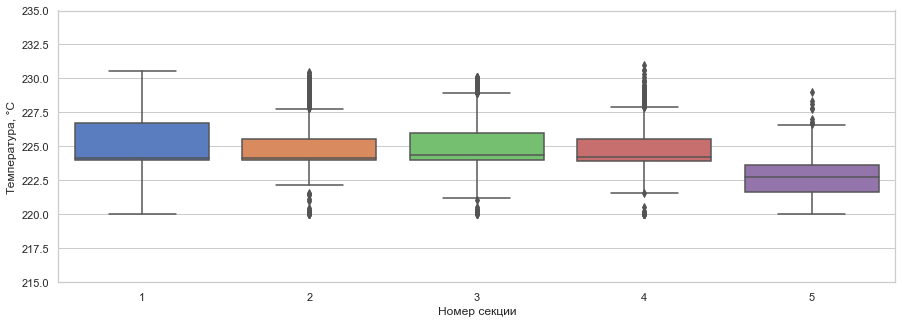

In [269]:
cdf = pd.concat(
    [
        df_corr_T_QQ[["T_C1"]].assign(S=1),
        df_corr_T_QQ[["T_C2"]].assign(S=2),
        df_corr_T_QQ[["T_C3"]].assign(S=3),
        df_corr_T_QQ[["T_C4"]].assign(S=4),
        df_corr_T_QQ[["T_C5"]].assign(S=5),
    ]
)

mdf = pd.melt(cdf, id_vars="S")

f, ax = plt.subplots(figsize=(15, 5))

ax = sns.boxplot(data=mdf, y="value", x="S")
ax.set_ylabel("Температура, °С")
ax.set_xlabel("Номер секции")
ax.set_ylim([215, 235])

plt.show()

А теперь посмотрим во времени, когда температурные датчики автоклава показывали корректные значения.

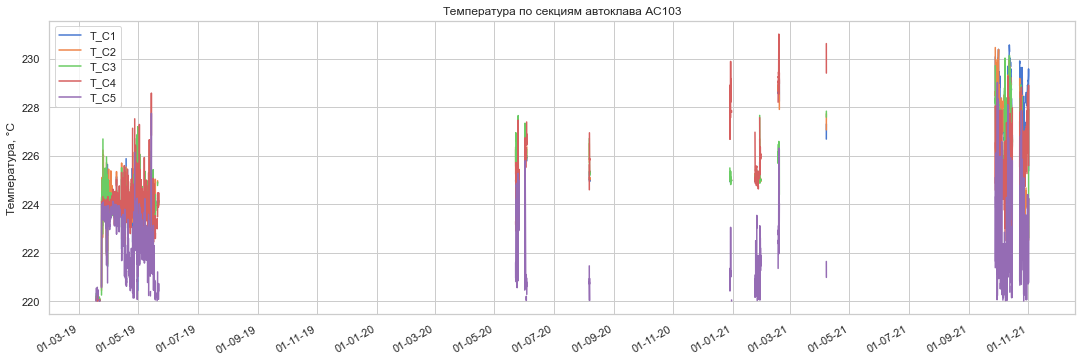

In [270]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols[:-1]:
    ax.plot(df_corr_T_QQ[col].resample('H').first().fillna(value=np.nan))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    
f.autofmt_xdate();
f.tight_layout();

ax.set_title('Температура по секциям автоклава АС103')
ax.set_ylabel('Температура, °С')

ax.legend(T_cols[:-1])

plt.show();

### Давление в автоклаве и расход кислорода

In [271]:
O2_cols = [
    'O2_C1',
    'O2_C2',
    'O2_C3',
    'O2_C4',
    'O2_C5',
    'O2_conc_1',
    'O2_conc_2',
]

P_cols = [
    'P_H2O',
    'P_O2',
    'P_tot',
    'P_valve'
]

Посмотрим общие статистики по подаче кислорода.

In [272]:
df_work[O2_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
O2_C1,"12,467.00","2,092.04",322.61,-0.76,"1,845.17","2,099.58","2,293.07","3,020.28"
O2_C2,"12,456.00","1,921.73",280.01,459.26,"1,774.22","1,865.58","2,079.24","2,663.64"
O2_C3,"12,467.00",978.37,159.27,-0.53,883.52,963.12,"1,059.10","1,472.31"
O2_C4,"12,457.00",382.76,91.31,-0.00,335.95,370.12,419.99,750.26
O2_C5,"12,467.00",152.23,31.63,-0.09,130.03,155.05,172.98,300.23
O2_conc_1,"11,593.00",96.73,12.70,0.00,95.00,99.80,99.90,100.00
O2_conc_2,"11,597.00",99.56,0.69,30.39,99.49,99.60,99.80,100.00


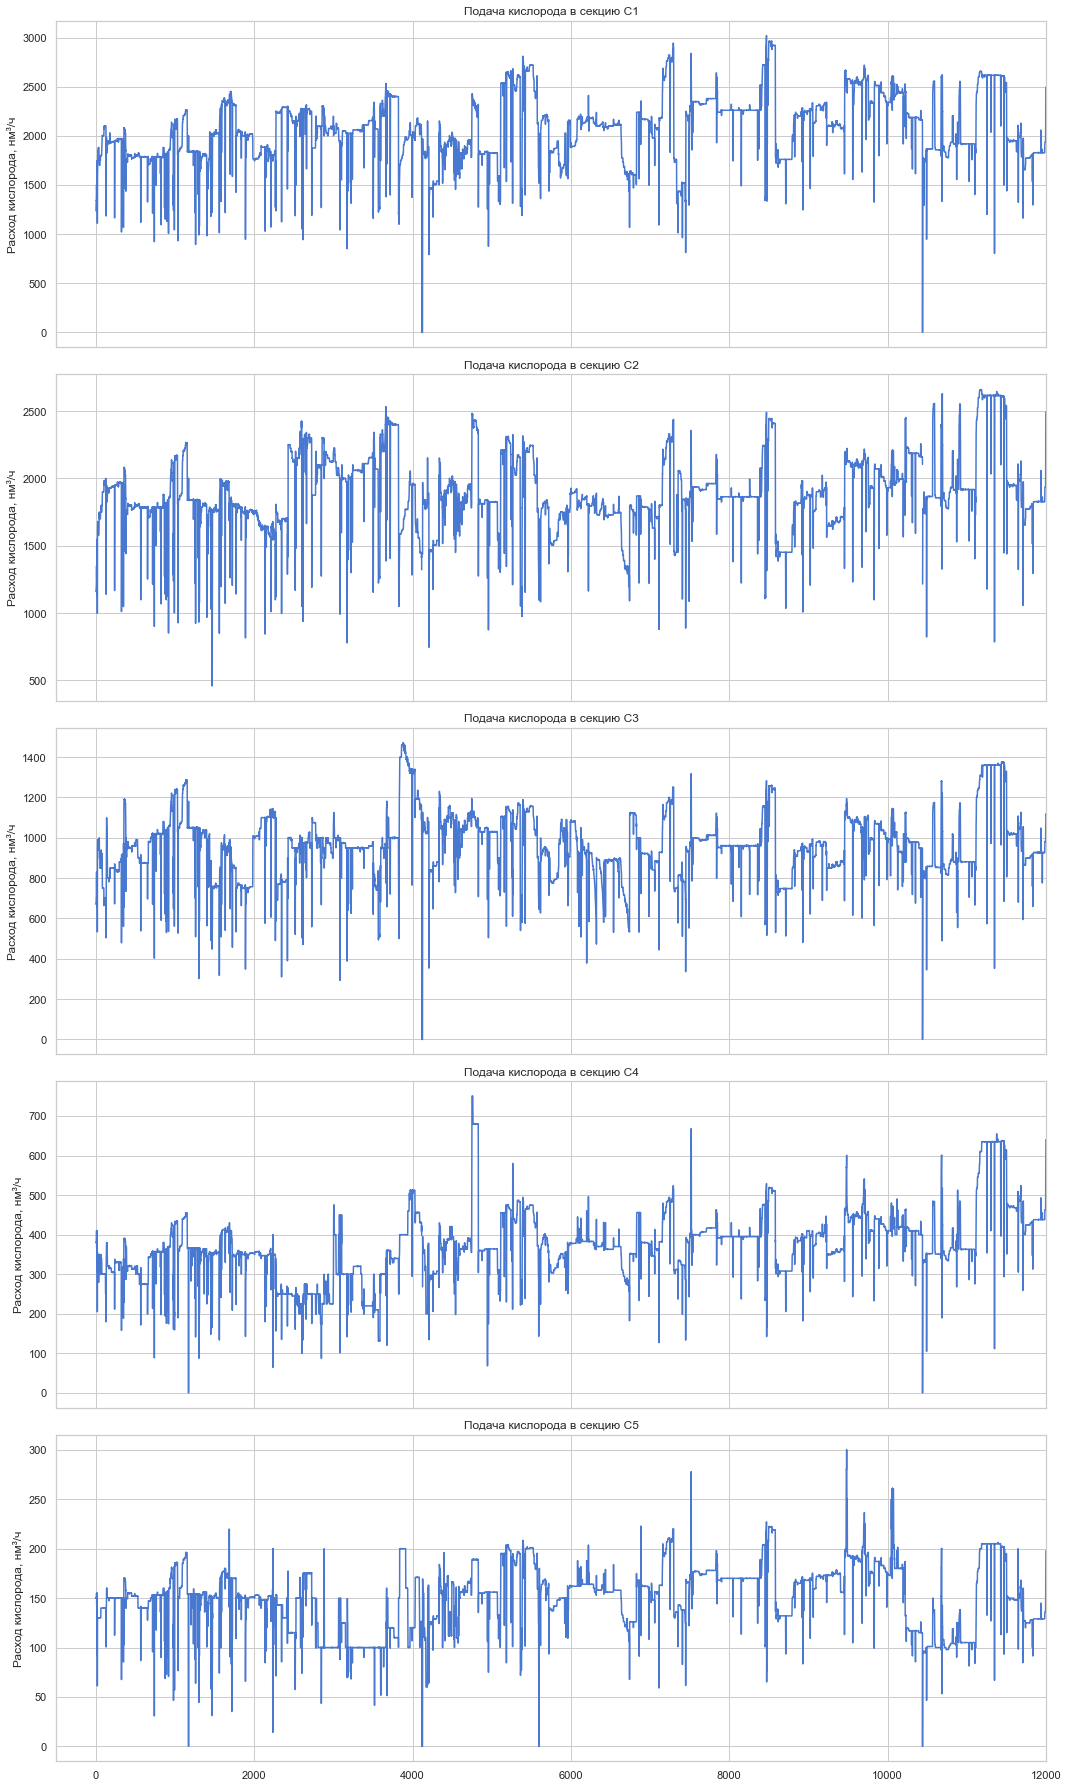

In [273]:
f, ax = plt.subplots(5, 1, figsize=(15,25), sharex=True)

for i, col in enumerate(O2_cols[:-2]):
    ax[i].plot(df_work[col].values)
    # rolling_mean = df_work[col].rolling(window=24).mean()
    # ax[i].plot(rolling_mean.values, c='red')
    ax[i].set_title(f'Подача кислорода в секцию {col[-2:]}')
    ax[i].set_ylabel('Расход кислорода, нм³/ч')

ax[4].set_xlim(-500, 12000)
f.tight_layout();

plt.show();

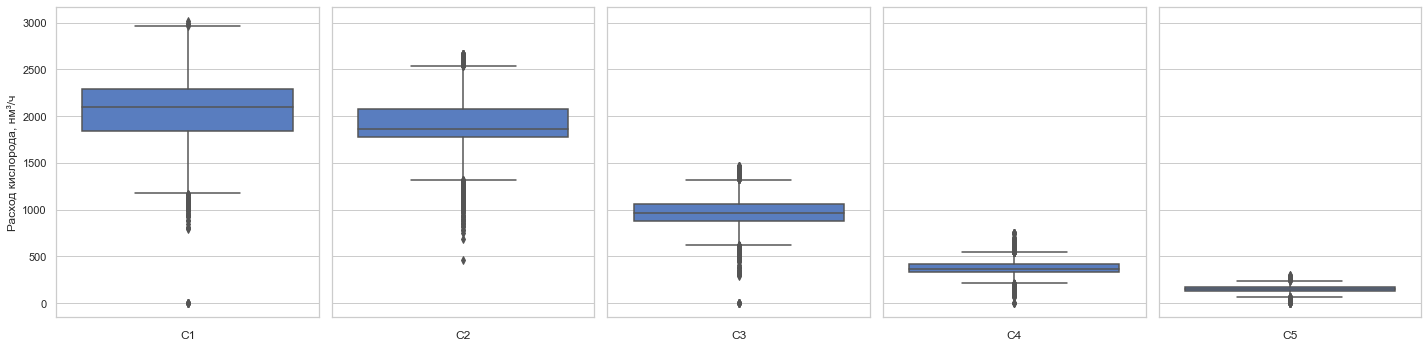

In [274]:
f, ax = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, col in enumerate(O2_cols[:-2]):
    sns.boxplot(data=df_work, y=col, ax=ax[i])
    ax[i].set_ylabel('')
    ax[0].set_ylabel('Расход кислорода, нм³/ч')
    ax[i].set_xlabel(col[-2:])

f.tight_layout();

plt.show();

Данные по чистоте кислорода использовать, скорее всего, нецелесообразно ввиду их практически постоянства.

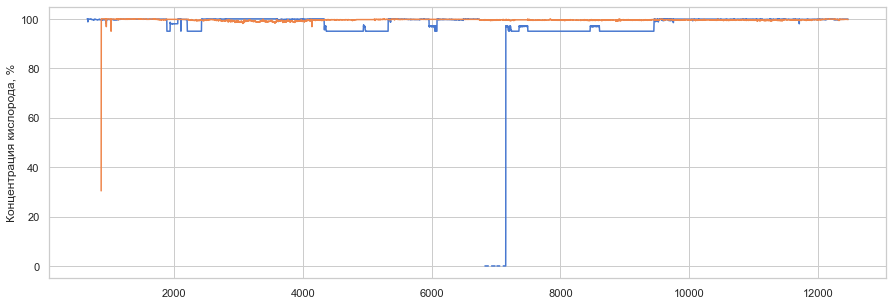

In [275]:
f, ax = plt.subplots(figsize=(15,5))

plt.plot(df_work['O2_conc_1'].values)
plt.plot(df_work['O2_conc_2'].values)

ax.set_ylabel('Концентрация кислорода, %')

plt.show();

Давление P_tot и P_tot_2 целесообразно объединить в одно значение, взяв среднее.

In [276]:
df_work = df_work.assign(P_tot = df_work[['P_tot', 'P_tot_2']].mean(axis=1))

In [277]:
df_work.drop('P_tot_2', inplace=True, axis=1)

Посмотрим общие статистики по давлению

In [278]:
df_work[P_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
P_H2O,"12,466.00",24.71,0.86,15.94,24.22,24.80,25.27,28.16
P_O2,"12,467.00",6.23,0.80,1.90,5.70,6.18,6.73,8.96
P_tot,"12,467.00",29.94,0.54,3.28,29.99,30.00,30.01,31.07
P_valve,"12,467.00",48.28,26.99,0.24,25.40,44.48,72.09,100.00


Скорее всего общее давление можно вообще удалить, так как это точно линейная комбинация давления паров воды и парциального давления кислорода.

In [279]:
df_work[df_work['P_H2O']<5]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq


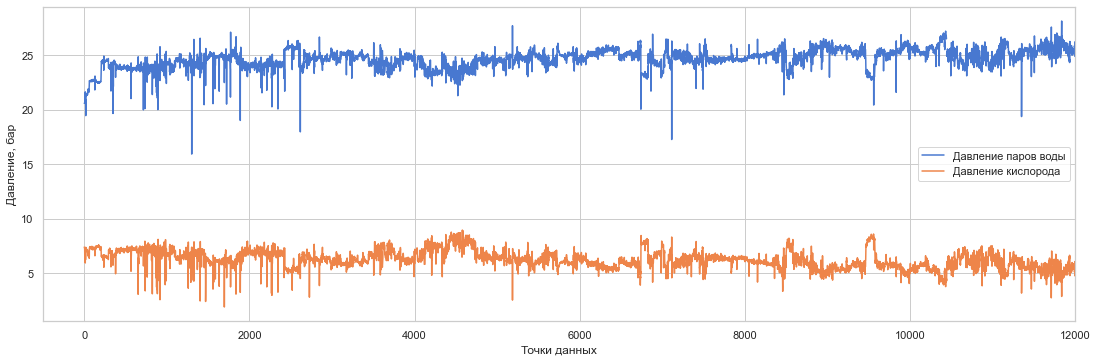

In [280]:
f, ax = plt.subplots(figsize=(15,5))

for col in ['P_H2O', 'P_O2']:
    ax.plot(df_work[col].values)

f.tight_layout();

ax.set_ylabel('Давление, бар')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12000)

ax.legend(['Давление паров воды', 'Давление кислорода'])

plt.show();

Посмотрим распределение давления кислорода и паров воды.

Text(0, 0.5, 'Давление кислорода, бар')

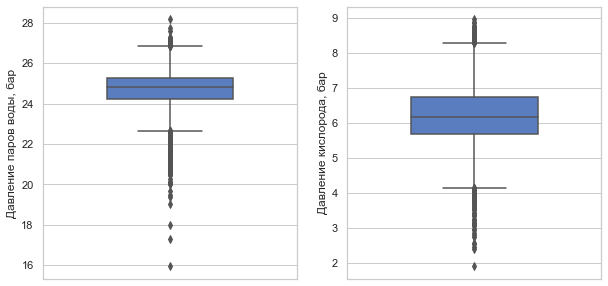

In [281]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df_work, y="P_H2O", ax=axs[0], width=0.5)
sns.boxplot(data=df_work, y="P_O2", ax=axs[1], width=0.5)

axs[0].set_ylabel('Давление паров воды, бар')
axs[1].set_ylabel('Давление кислорода, бар')


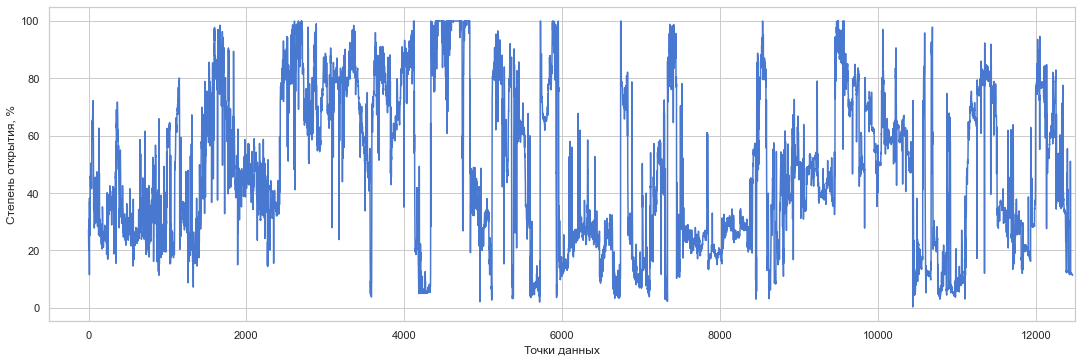

In [282]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['P_valve'].values)

f.tight_layout();

ax.set_ylabel('Степень открытия, %')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12500)

plt.show();

А теперь посмотрим корреляции и для начала выберем нужные колонки с данными

In [283]:
corr_cols = [
    'O2_C1',
    'O2_C2',
    'O2_C3',
    'O2_C4',
    'O2_C5',
    'P_H2O',
    'P_O2',
    'P_valve',
    'QQ_C1',
    'QQ_C2',
    'QQ_C3',
    'QQ_C4',
    'QQ_C5',
    'Fe',
    'Stot',
    'As',
    'Corg',
    'Ctot',
    'Fe2+'
]

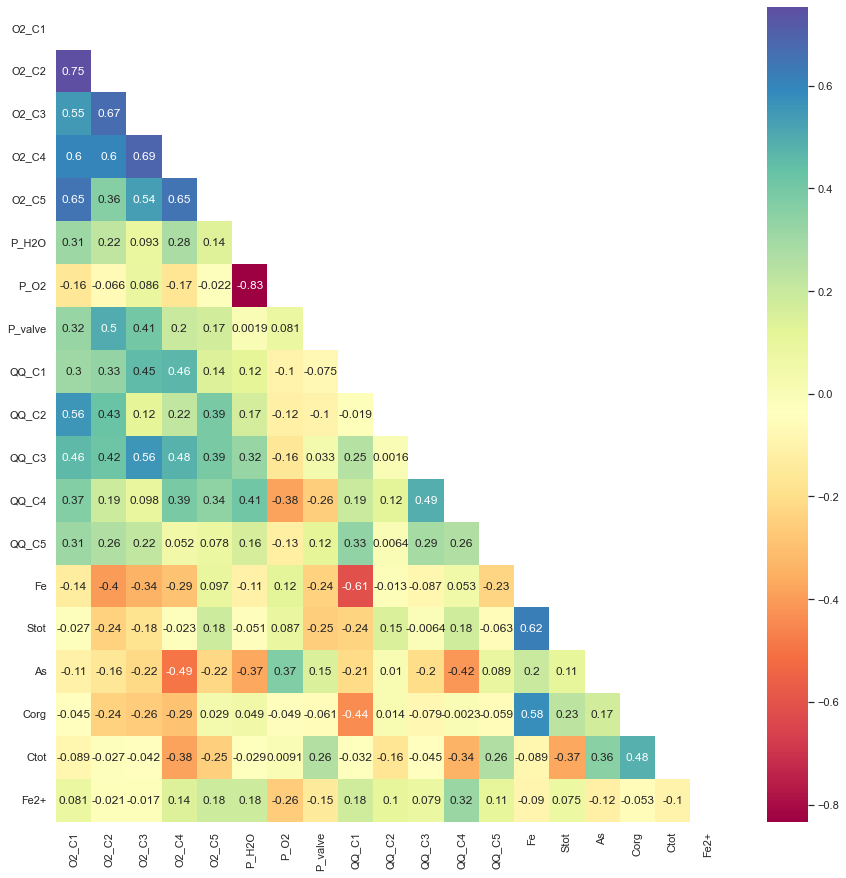

In [284]:
corr = df_work[corr_cols].corr()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="Spectral", mask=mask);
plt.yticks(rotation=0)
plt.show();

### Уровень в автоклаве и клапан сброса

In [285]:
l_cols = [
    'AC_level',
    'AC_valve_open'
]

In [286]:
df_work[l_cols].describe()

,AC_level,AC_valve_open
count,"12,467.00","12,466.00"
mean,66.51,30.38
std,5.16,22.34
min,43.79,0.53
25%,60.01,14.54
50%,69.99,24.56
75%,70.00,37.46
max,77.43,100.00


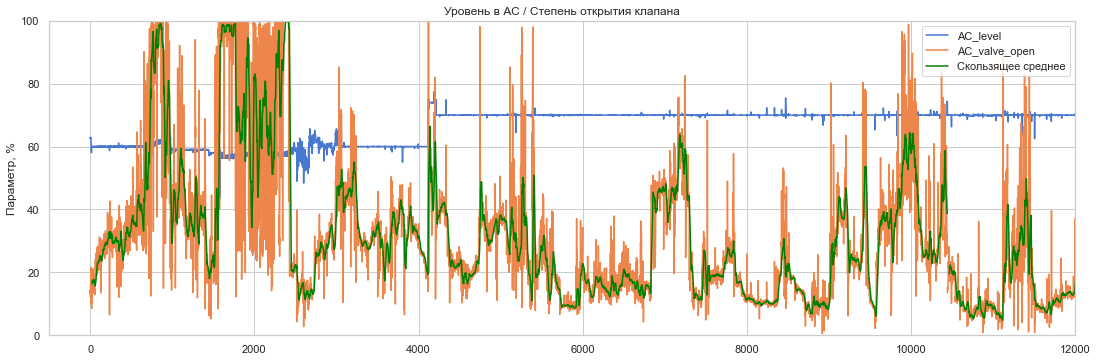

In [287]:
f, ax = plt.subplots(figsize=(15,5))

for col in l_cols:
    ax.plot(df_work[col].values)

rolling_mean = df_work['AC_valve_open'].rolling(window=24).mean()
ax.plot(rolling_mean.values, c='green')

f.tight_layout();

ax.set_title('Уровень в АС / Степень открытия клапана')
ax.set_ylabel('Параметр, %')
ax.set_ylim([0, 100])
ax.set_xlim(-500, 12000)

ax.legend(l_cols + ['Скользящее среднее'])

plt.show();

## Сохраним итоговый файл для дальнейших расчётов¶

In [288]:
df_work[df_work < 0] = 0

In [289]:
df_work.describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"10,834.00",23.64,19.48,0.00,0.00,29.00,42.06,49.28
Fel_2,"11,372.00",27.43,18.56,0.00,0.00,34.08,42.74,50.00
D_SL,"12,467.00","1,530.71",258.60,975.69,"1,585.60","1,637.97","1,677.01","1,841.55"
QQ_C1,"12,369.00",14.51,8.63,0.00,7.22,14.88,20.23,39.86
QQ_C2,"12,467.00",29.90,7.76,0.01,27.50,31.67,34.69,42.97
QQ_C3,"12,458.00",16.76,3.16,0.00,15.51,17.38,18.97,23.01
QQ_C4,"12,467.00",5.10,3.12,0.00,1.73,5.17,8.28,9.95
QQ_C5,"12,256.00",1.28,0.89,0.00,0.63,1.02,1.79,7.77
O2_tot,"12,467.00","5,525.13",772.86,0.00,"5,106.91","5,444.94","5,874.54","7,550.74"
QQ_tot,"12,467.00",67.41,14.37,0.01,58.82,66.80,79.07,98.51


In [290]:
comp = {
        'method': 'zip',
        'archive_name': 'out.csv'
    }

filepath = Path(f'./{WORK_DIR}/df_work_ds_final.zip')

df_work.to_csv(filepath, compression=comp)